In [11]:
#importing all the required library for preliminary analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# importing data for analysis
data = pd.read_csv('Advertising.csv',index_col=0)

In [6]:
# gives the sample of data
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [8]:
# view of columns
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [10]:
data.shape

(200, 4)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

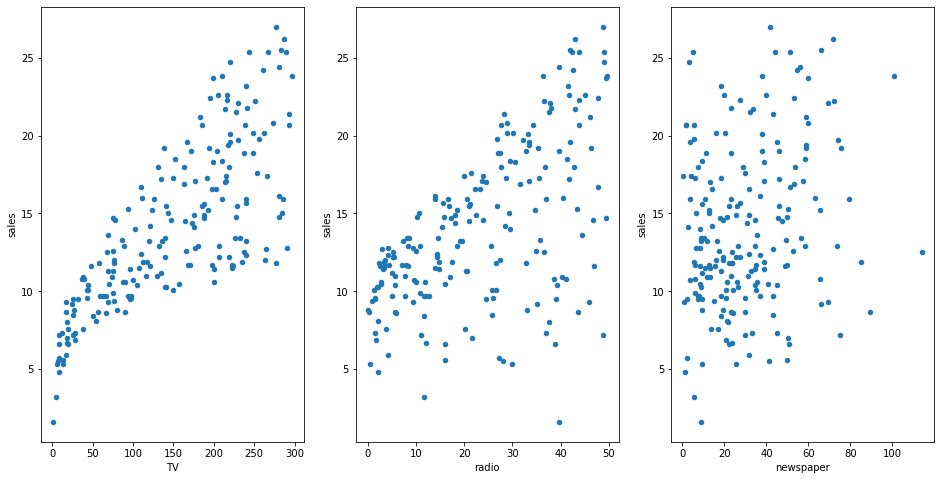

In [19]:
# it tells how the data is scattered to sales
# axs and ax is used to plot graph each individually
fig, axs = plt.subplots(1,3)
data.plot(kind = 'scatter', x = 'TV', y = 'sales', ax = axs[0],figsize=(16,8))
data.plot(kind = 'scatter', x = 'radio',y = 'sales', ax = axs[1])
data.plot(kind = 'scatter', x = 'newspaper', y = 'sales', ax = axs[2])

<AxesSubplot:>

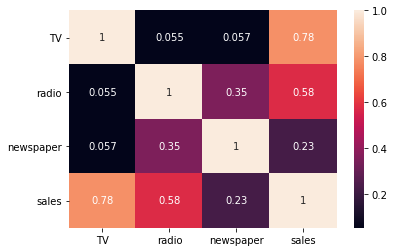

In [22]:
# heatmap tells relationship between variable with time it is a best visualise tool to see data correlation
# 
import seaborn as sns
sns.heatmap(data.corr(),annot = True)

 1 tells highly correlated 
 0 tells less coreelated 
 so we can see tv with sales and radio with sales and newspaper with sales where radio with sales is highly correlated then tv and also newspaper is more correlated then radio it gives how data is 

In [34]:
# dividing features and target variables and we are creating a array or 2 d format to train data
features = data[['TV']].values
target = data[['sales']].values

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 20)

In [38]:
from sklearn.linear_model import LinearRegression

In [44]:
model = LinearRegression()

In [46]:
# fitting a model for training and testing of data
model.fit(x_train,y_train)

LinearRegression()

In [49]:
# gives linear relationship between two variables
model.coef_

array([[0.0455393]])

so we observe that between tv and sales we have only 0.04% correlation which is very less negative correlation

In [51]:
# it gives average rate of change
model.intercept_

array([7.29068502])

 the point or y will get intersect at 7.2 in a graph y=mx+c is a formula to find slope of line
1. a unit increase in tv ad spending was associated with a 0.48 unit increase in sales or an additional 1000$ spent on    tv was associated with an increase in sales of 48.734 units

 in a market my spend on tv is $50000 i want you to tell me the sales generated due to this spend

In [52]:
0.46*50 + 7.290

30.29

if you invest $50000 in a market then 30.29 units of sales will be increased

In [53]:
x_new = pd.DataFrame({'tv':[data.TV.min(),data.TV.max()]})
x_new

,tv
0,0.7
1,296.4


In [54]:
pred = model.predict(x_new)

In [55]:
pred

array([[ 7.32256253],
       [20.78853337]])

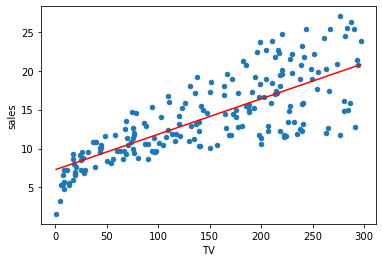

In [57]:
data.plot(kind ='scatter',x ='TV', y = 'sales' )
plt.plot (x_new,pred,c = 'red')

In [59]:
import statsmodels.formula.api as smf

In [63]:
stat_model = smf.ols(formula = 'sales ~ TV', data=data).fit()
     
stat_model.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

H 0: there is no relationship between independent(TVvariable and dependent(sales) variable

H! :there is a relationship between independent(tv) variable and dependent(sales) variable

if my p value for tv is less than 0.5 then i will reject the null hypothesis

In [65]:
stat_model.rsquared

0.611875050850071

to find the loss function in all the feature and target variable

In [66]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

#Evaluation on train data

In [68]:
my_linear_preds_train = model.predict(x_train)
print('MAE on Train Data :', mean_absolute_error(my_linear_preds_train,y_train))
print('MSE on Train Data :', mean_squared_error(my_linear_preds_train,y_train))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_linear_preds_train,y_train)))
print('R-squared on Train Data :', model.score(x_train, y_train))

MAE on Train Data : 2.5778239541292316
MSE on Train Data : 10.366246355505412
RMSE on Train Data : 3.219665565785585
R-squared on Train Data : 0.5821664565669462


Evaluation on test data

In [69]:
my_model_preds = model.predict(x_test)
print('MAE on Train Data :', mean_absolute_error(my_model_preds,y_test))
print('MSE on Train Data :', mean_squared_error(my_model_preds,y_test))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_model_preds,y_test)))
print('R-squared on Train Data :', model.score(x_test, y_test))

MAE on Train Data : 2.515974666326701
MSE on Train Data : 11.250908995197378
RMSE on Train Data : 3.3542374685161125
R-squared on Train Data : 0.6891206834040503


Mutiple Linear Regression

In [71]:
features = data[['TV','radio','newspaper']]
target = data[['sales']]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 10, train_size = .80)

In [73]:
multiple_linear = LinearRegression()

In [74]:
multiple_linear.fit(X_train,y_train)

LinearRegression()

In [75]:
multiple_linear.coef_

array([[ 0.0437726 ,  0.19343299, -0.00222879]])

In [76]:
multiple_linear.intercept_

array([3.25409711])

Evaluation on train data


In [78]:
my_multiple_linear_preds_train = multiple_linear.predict(X_train)
print('MAE on Train Data :', mean_absolute_error(my_multiple_linear_preds_train,y_train))
print('MSE on Train Data :', mean_squared_error(my_multiple_linear_preds_train,y_train))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_multiple_linear_preds_train,y_train)))
print('R-squared on Train Data :', multiple_linear.score(X_train, y_train))

MAE on Train Data : 1.0661435033472693
MSE on Train Data : 1.8585966709492503
RMSE on Train Data : 1.3633035872281898
R-squared on Train Data : 0.9209087553499528


E